In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import dataset
results_df = pd.read_csv("results.csv") 
results_df

,Model,Accuracy,Precision,Sensitivity,Specificity,F1,FLOPs,Parameters
0,MobileLookNet,0.84377,0.82838,0.82792,0.85372,0.80352,377720000,178850
1,MobileLookNet + FF,0.84457,0.83288,0.83019,0.85098,0.81375,328530000,92274
2,MobileLookNet + A,0.82295,0.76995,0.84562,0.81283,0.78383,332490000,101076
3,MobileLookNet + FF + A,0.81278,0.75488,0.85668,0.79238,0.77209,332500000,104990
4,MobileLookNet w/ 1 rep/group,0.68710,0.68309,0.65642,0.70503,0.58150,237900000,28666
5,MobileLookNet w/ 2 reps/group,0.72621,0.71816,0.82160,0.67318,0.71810,378410000,58898
6,MobileLookNet w/ 3 reps/group,0.88420,0.84635,0.84981,0.90381,0.83770,518930000,89130
7,MobileLookNet Deep,0.89312,0.86124,0.88181,0.90191,0.85967,567610000,199330
8,MobileLookNet Rev Groups,0.80212,0.76565,0.87921,0.75584,0.78574,560580000,53034
9,MobileLookNet Rev Reps,0.81648,0.88861,0.57209,0.94132,0.65780,564850000,49146


In [8]:
mobilelooknet_results_df = results_df[0:10]

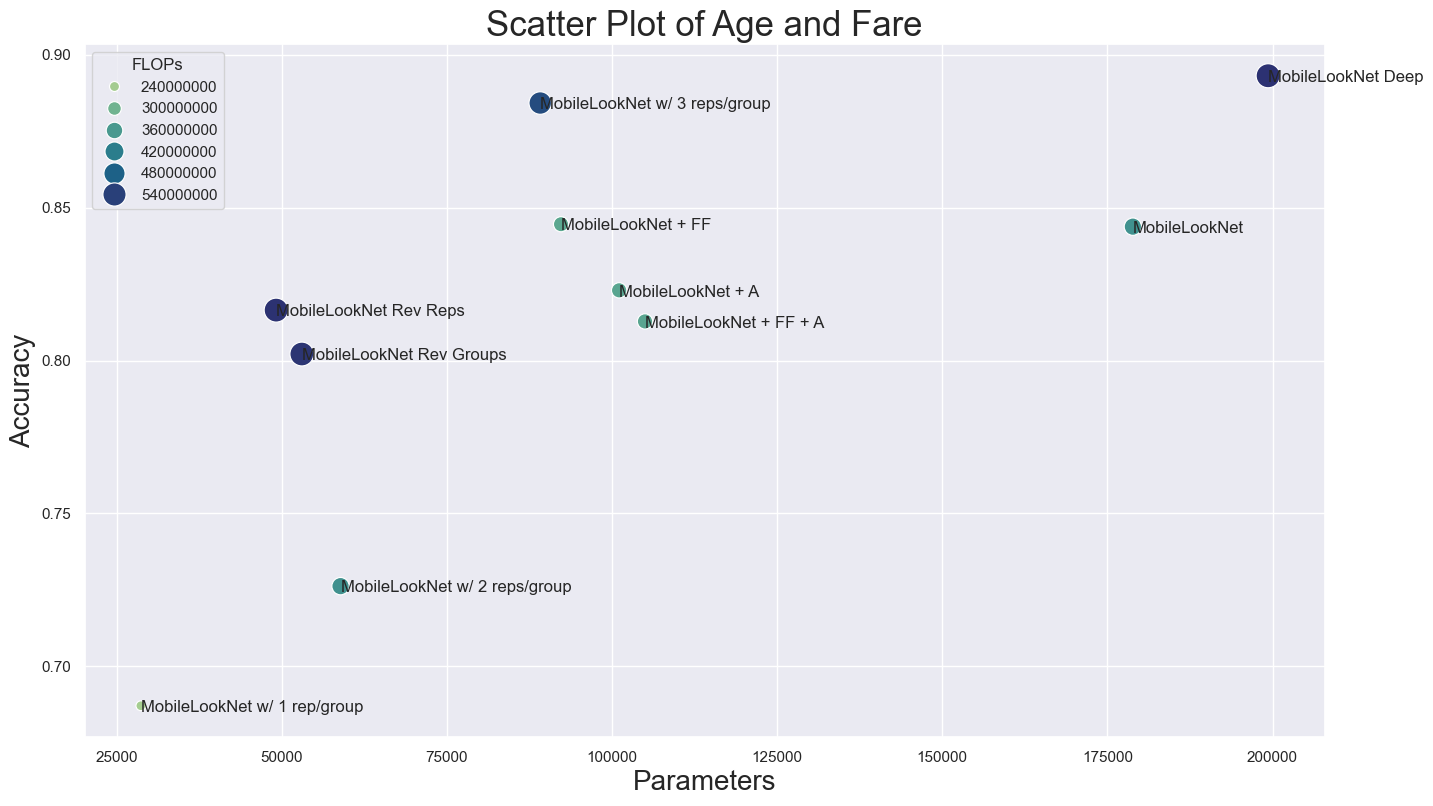

In [43]:
# Create scatter plot
plt.figure(figsize = (16,9)) # figure size in 16:9 ratio

sns.scatterplot(x = "Parameters",
                y = "Accuracy",
                data = mobilelooknet_results_df,
                palette = "crest",
                hue = "FLOPs",
                size = "FLOPs",
                sizes = (50, 300))
 
def label_point(x, y, val, size, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']-.002, str(point['val']))

label_point(mobilelooknet_results_df.Parameters,
            mobilelooknet_results_df.Accuracy,
            mobilelooknet_results_df.Model,
            mobilelooknet_results_df.FLOPs,
            plt.gca())

plt.title("Scatter Plot of Age and Fare", fontsize = 25)
plt.xlabel("Parameters", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.show()